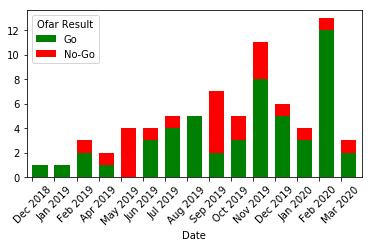

In [93]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import datetime

df = pd.read_excel('mapletree testing efficiency.xlsx',index=False)

# SELECT ONLY THE TWO COLUMNS WE WANT
df = df[['Lift Handover Date','Ofar result']]
df.dropna(inplace=True)


# CONVERT STRINGS IN LIFT HANDOVER DATE COLUMN TO DATETIME OBJECT
df['Lift Handover Date'] = pd.to_datetime(df['Lift Handover Date'])


# EXTRACT YEAR AND MONTH OF LIFT HANDOVER DATE COLUMN INTO 2 SEPARATE COLUMNS
df['year'], df['month'] = df['Lift Handover Date'].dt.year, df['Lift Handover Date'].dt.month


# CLEAN UP DATA
df['Ofar Result'] = df['Ofar result'].map({'GO': 'Go', 'No-go': 'No-Go'})


# CONVERT MONTH AND YEAR INTO A SINGLE DATETIME OBJECT MONTHYEAR
for i in range(len(df)):
    df.loc[i, 'MonthYear'] = datetime.datetime(df.loc[i, 'year'], df.loc[i, 'month'], 1)
    
    
# SORT BY MONTH AND YEAR
df2 = df.groupby(['MonthYear','Ofar Result'])['MonthYear'].count().unstack('Ofar Result').sort_values('MonthYear').fillna(0)


# EXTRACT MONTH AND YEAR FROM MONTHYEAR INTO NEW COLUMN MONTHYEAR2 AS STRING
df2['MonthYear2'] = df2.index
df2['MonthYear2'] = df2['MonthYear2'].dt.month.astype(str) + ' ' + df2['MonthYear2'].dt.year.astype(str)


# DEFINE FUNCTION TO CONVERT STR NUMBER OF MONTH INTO NAME OF MONTH
def convertIntoReadableString(s):
    s_lst = s.split()
    s_month = s_lst[0]
    s_month_dct = {'1': 'Jan',
                   '2': 'Feb',
                   '3': 'Mar',
                   '4': 'Apr',
                   '5': 'May',
                   '6': 'Jun',
                   '7': 'Jul',
                   '8': 'Aug',
                   '9': 'Sep',
                   '10': 'Oct',
                   '11': 'Nov',
                   '12': 'Dec'
                  }
    
    name_month = s_month_dct[s_month]
    return name_month + ' ' + s_lst[1]


# APPLY CONVERSION
df2['MonthYear_readable'] = df2['MonthYear2'].map(lambda s: convertIntoReadableString(s))


# SET MONTHYEAR_READABLE AS INDEX
df2.set_index('MonthYear_readable', inplace=True)


df2[['Go','No-Go']].plot(kind='bar', stacked=True, width = 0.7, align = 'edge', color = ['g','r'])


plt.xticks(rotation=45)
plt.xlabel('Date')
plt.gcf().subplots_adjust(bottom=0.30)
plt.savefig('Mapletree efficiency bar chart updated.png',dpi=1000) 
plt.show()
